In [32]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the Data


In [3]:
energy = pd.read_csv("UCI_data.csv")

In [7]:
energy.head()

,date,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy
0,2016-04-19 20:30:00,22.200000,39.500000,20.566667,37.656667,22.230000,37.030000,22.318571,36.610000,20.633333,...,33.90,9.70,766.100000,65.5,3.500000,40.000000,3.350000,24.061869,24.061869,60
1,2016-03-05 04:40:00,20.356667,37.126667,17.566667,40.230000,20.890000,37.663333,18.700000,36.260000,18.463333,...,41.09,0.30,740.333333,99.0,1.000000,41.333333,0.100000,4.622052,4.622052,50
2,2016-03-14 12:40:00,20.926667,38.790000,21.100000,35.526667,21.600000,36.290000,21.000000,34.826667,18.100000,...,38.76,4.40,768.466667,72.0,6.000000,22.666667,-0.266667,5.635898,5.635898,80
3,2016-01-22 15:30:00,18.290000,38.900000,17.290000,39.260000,18.390000,39.326667,16.100000,38.790000,16.100000,...,39.20,3.35,760.600000,82.0,5.500000,41.000000,0.500000,49.216445,49.216445,40
4,2016-02-10 00:40:00,22.290000,42.333333,21.600000,40.433333,22.666667,43.363333,19.100000,40.900000,19.290000,...,43.73,3.20,738.900000,88.0,7.333333,56.000000,1.400000,47.617579,47.617579,60


In [8]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           19735 non-null  object 
 1   T1             19735 non-null  float64
 2   RH_1           19735 non-null  float64
 3   T2             19735 non-null  float64
 4   RH_2           19735 non-null  float64
 5   T3             19735 non-null  float64
 6   RH_3           19735 non-null  float64
 7   T4             19735 non-null  float64
 8   RH_4           19735 non-null  float64
 9   T5             19735 non-null  float64
 10  RH_5           19735 non-null  float64
 11  T6             19735 non-null  float64
 12  RH_6           19735 non-null  float64
 13  T7             19735 non-null  float64
 14  RH_7           19735 non-null  float64
 15  T8             19735 non-null  float64
 16  RH_8           19735 non-null  float64
 17  T9             19735 non-null  float64
 18  RH_9  

In [14]:
print("Total Number of Columns in Dataset = {}".format(energy.columns.shape[0]))
print("Number of Instances/Row in Dataset = {}".format(energy.shape[0]))


Total Number of Columns in Dataset = 28
Number of Instances/Row in Dataset = 19735


In [17]:
#Checking for null values columnwise
print("Count of null values")
print(energy.isnull().sum())

Count of null values
date             0
T1               0
RH_1             0
T2               0
RH_2             0
T3               0
RH_3             0
T4               0
RH_4             0
T5               0
RH_5             0
T6               0
RH_6             0
T7               0
RH_7             0
T8               0
RH_8             0
T9               0
RH_9             0
T_out            0
Press_mm_hg      0
RH_out           0
Windspeed        0
Visibility       0
Tdewpoint        0
rv1              0
rv2              0
TARGET_energy    0
dtype: int64


### Filtering columns based on types

In [25]:
# Columns for random variable data
col_randoms = ["rv1", "rv2"]
# Columns for temperature data
col_temperature = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
# Columns for humidity data
col_humidity = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]
# Columns for weather data
col_weather = ["T_out","Press_mm_hg","RH_out","Windspeed","Visibility", "Tdewpoint"] 




In [26]:

energy[col_temperature].describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,20.341219,22.267611,20.855335,19.592106,7.910939,20.267106,22.029107,19.485828
std,1.606066,2.192974,2.006111,2.042884,1.844623,6.090347,2.109993,1.956162,2.014712
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000
25%,20.760000,18.790000,20.790000,19.530000,18.277500,3.626667,18.700000,20.790000,18.000000
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.033333,22.100000,19.390000
75%,22.600000,21.500000,23.290000,22.100000,20.619643,11.256000,21.600000,23.390000,20.600000
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000


In [20]:
energy[col_humidity].describe()

,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,40.259739,40.420420,39.242500,39.026904,50.949283,54.609083,35.388200,42.936165,41.552401
std,3.979299,4.069813,3.254576,4.341321,9.022034,31.149806,5.114208,5.224361,4.151497
min,27.023333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667
25%,37.333333,37.900000,36.900000,35.530000,45.400000,30.025000,31.500000,39.066667,38.500000
50%,39.656667,40.500000,38.530000,38.400000,49.090000,55.290000,34.863333,42.375000,40.900000
75%,43.066667,43.260000,41.760000,42.156667,53.663333,83.226667,39.000000,46.536000,44.338095
max,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667


In [21]:
energy[col_weather].describe()

,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707
std,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648
min,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000
25%,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000
50%,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333
75%,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667
max,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000


In [23]:
energy['TARGET_energy'].describe()

count    19735.000000
mean       101.496833
std        104.380829
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1110.000000
Name: TARGET_energy, dtype: float64

### Data Visualisation

#### Correlation on each set of columns

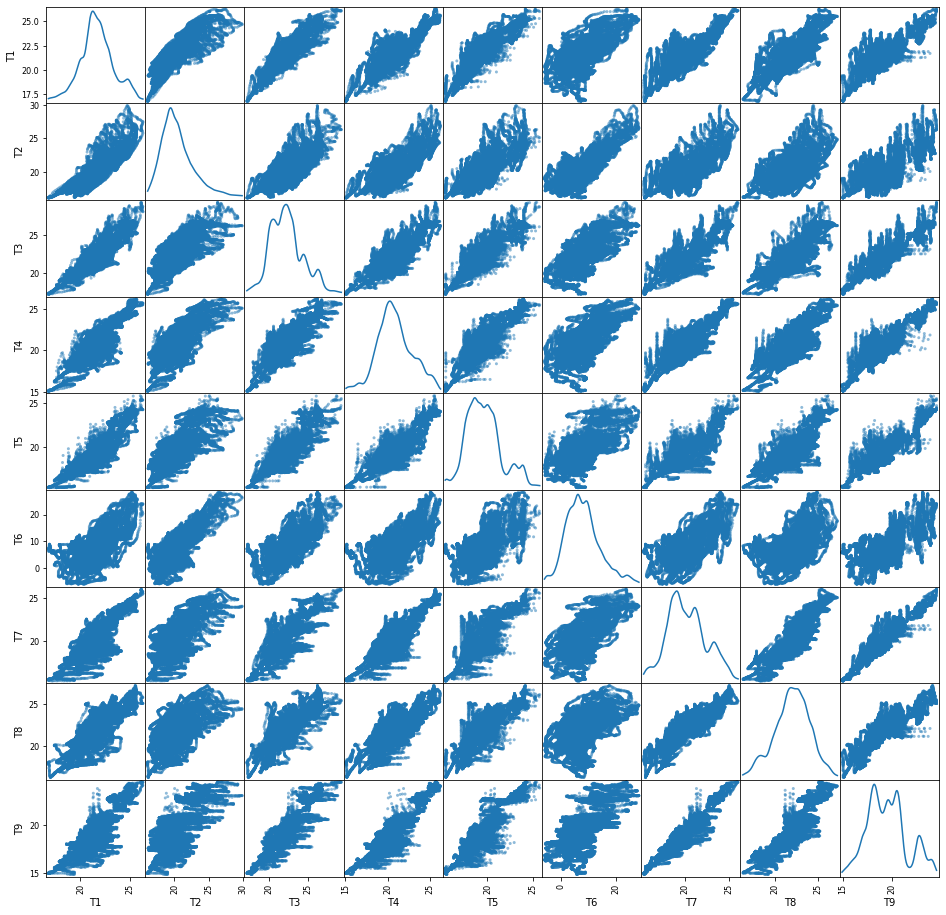

In [29]:
temperature=pd.plotting.scatter_matrix(energy[col_temperature],alpha=0.5, diagonal="kde", figsize=(16, 16))

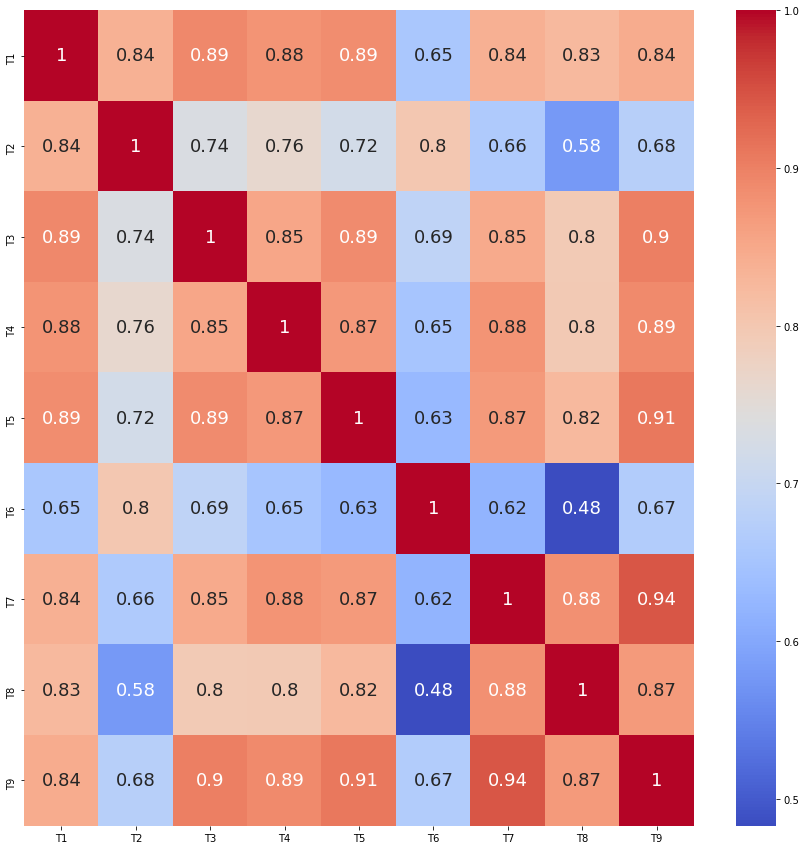

In [40]:
plt.figure(figsize=(15,15)) 
sns.heatmap(energy[col_temperature].corr(),cmap="coolwarm",annot=True, annot_kws={"size": 18})

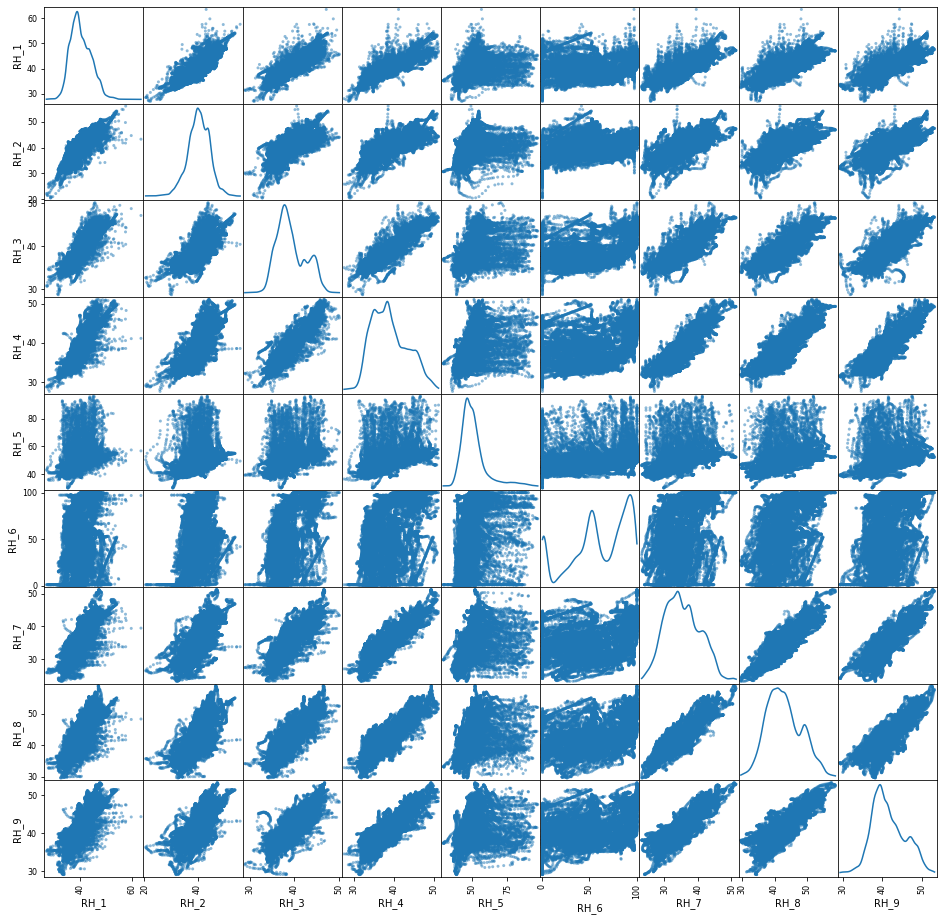

In [31]:
humidity=pd.plotting.scatter_matrix(energy[col_humidity], diagonal="kde", figsize=(16, 16))

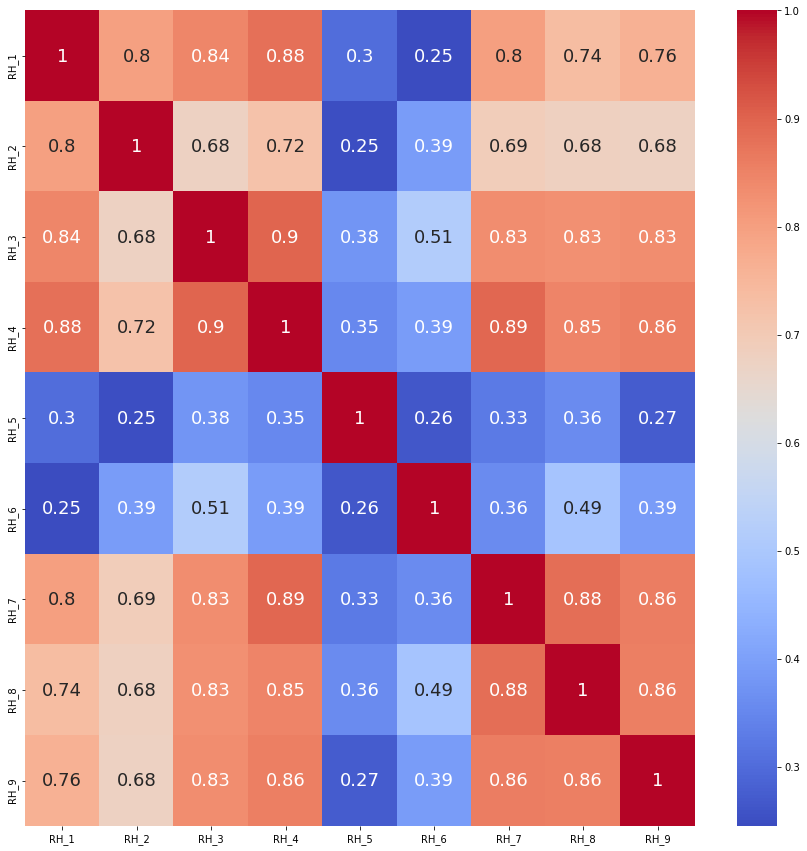

In [41]:
plt.figure(figsize=(15,15)) 
sns.heatmap(energy[col_humidity].corr(),cmap="coolwarm",annot=True, annot_kws={"size": 18})

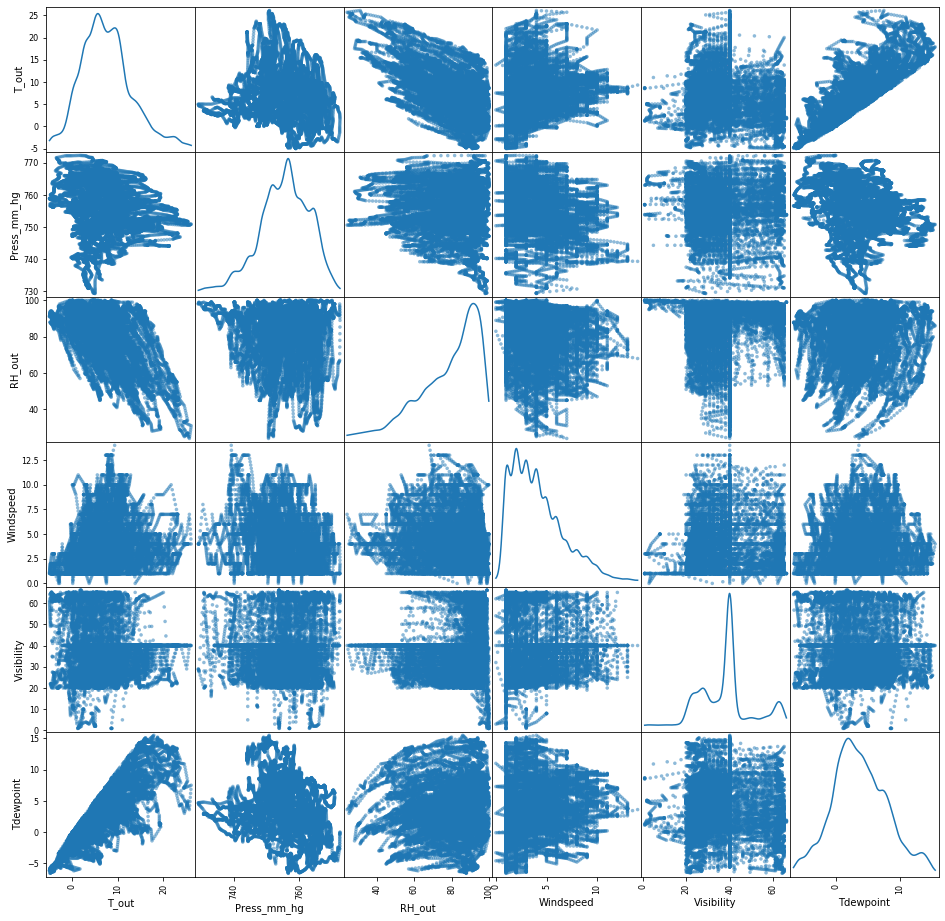

In [44]:
weather=pd.plotting.scatter_matrix(energy[col_weather], diagonal="kde", figsize=(16, 16))

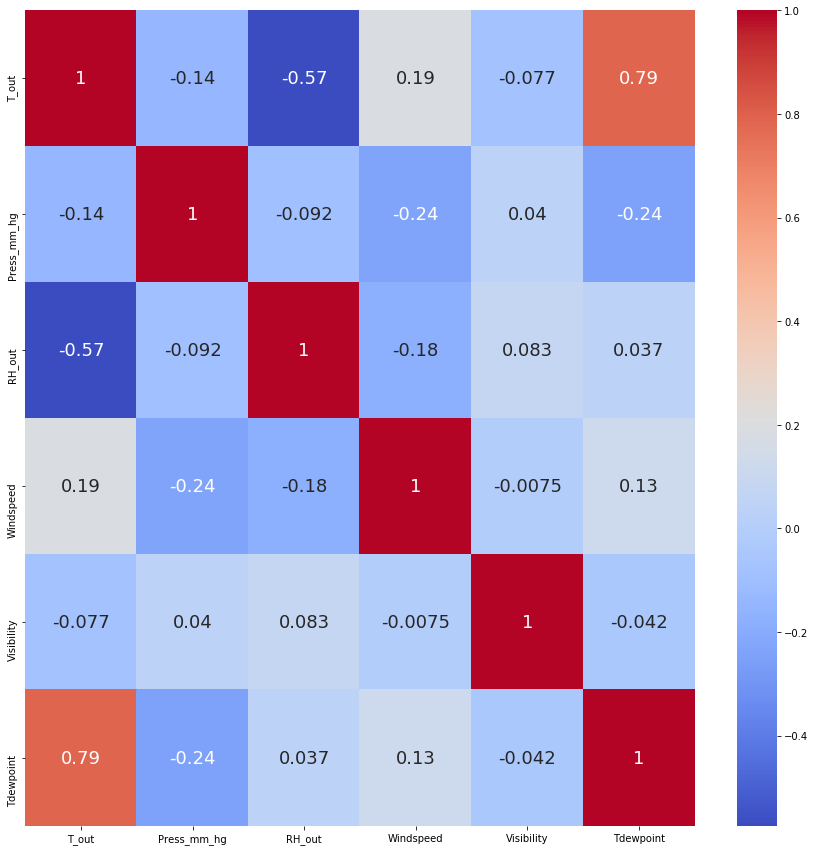

In [43]:
plt.figure(figsize=(15,15)) 
sns.heatmap(energy[col_weather].corr(),cmap="coolwarm",annot=True, annot_kws={"size": 18})

#### Normality Distribution

<Figure size 432x288 with 0 Axes>

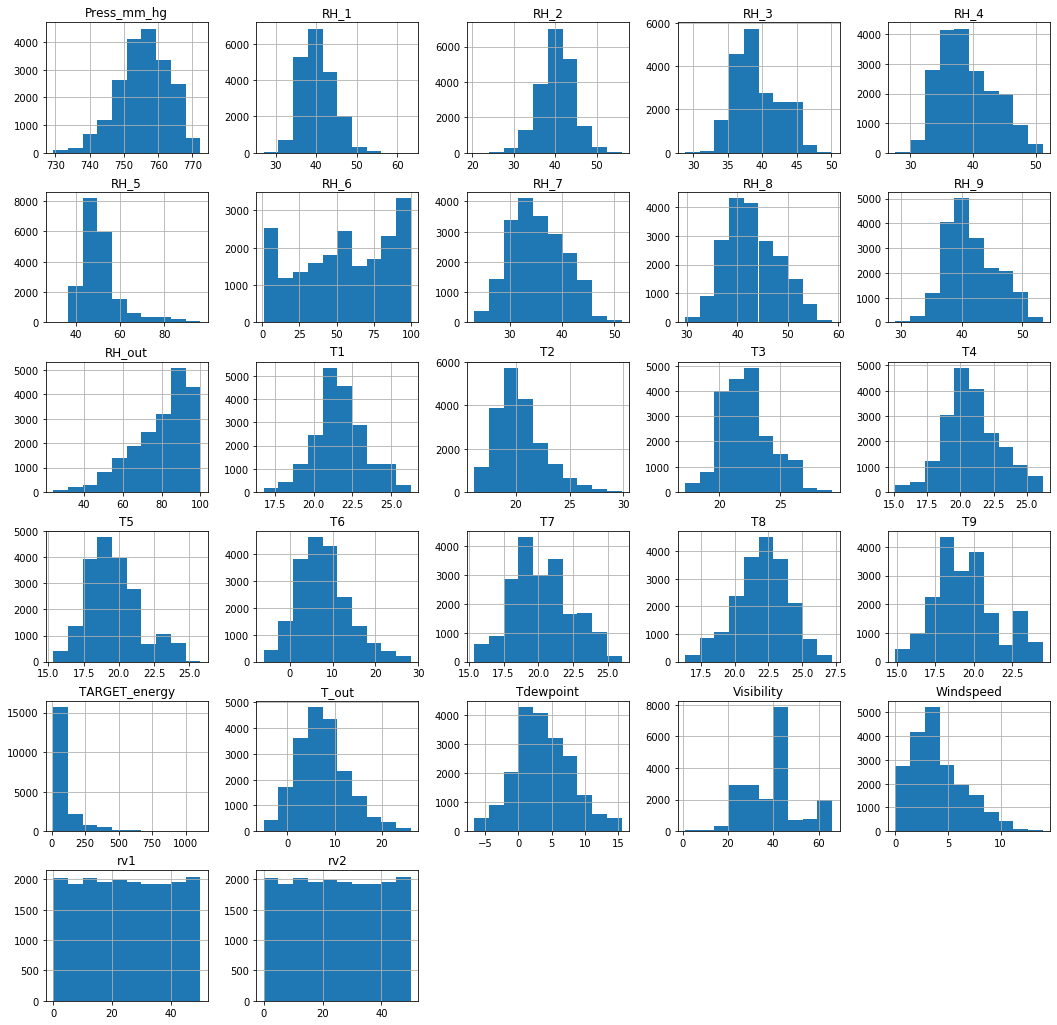

In [48]:
plt.figure()
energy.hist(figsize=(18,18))
plt.show()

## References

1. https://pandas.pydata.org/docs/reference/